In [451]:
#%%imports
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from lstein import (
    utils as lsu,
    makedata as md
)
from lstein import lstein
importlib.reload(lstein)


<module 'lstein.lstein' from '/home/lukas/github/LStein/src/lstein/lstein.py'>

### Get Data

In [452]:
#generate some data
raw, pro = md.simulate(opt="sin", theta=np.array([10,15,20,25,30]))
df_raw = pl.from_dict(raw)
df_pro = pl.from_dict(pro)
print(df_raw)

shape: (2_500, 5)
┌────────┬────────────┬───────────┬─────────────┬────────────┐
│ period ┆ time       ┆ amplitude ┆ amplitude_e ┆ processing │
│ ---    ┆ ---        ┆ ---       ┆ ---         ┆ ---        │
│ i64    ┆ f64        ┆ f64       ┆ f64         ┆ str        │
╞════════╪════════════╪═══════════╪═════════════╪════════════╡
│ 10     ┆ -50.0      ┆ -0.259507 ┆ NaN         ┆ raw        │
│ 10     ┆ -49.398798 ┆ 0.527201  ┆ NaN         ┆ raw        │
│ 10     ┆ -49.398798 ┆ 0.036007  ┆ NaN         ┆ raw        │
│ 10     ┆ -49.398798 ┆ 0.409687  ┆ NaN         ┆ raw        │
│ 10     ┆ -48.797595 ┆ 0.318708  ┆ NaN         ┆ raw        │
│ …      ┆ …          ┆ …         ┆ …           ┆ …          │
│ 30     ┆ 99.098196  ┆ 0.504063  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.699399  ┆ 0.961949  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.699399  ┆ 0.369936  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.699399  ┆ 1.269248  ┆ NaN         ┆ raw        │
│ 30     ┆ 100.0      ┆ 0.839736  ┆ N

In [ ]:
#get dimensions

##raw
df_raw_p = df_raw.partition_by("period")    #partition by unique values in `"period"`
theta_raw = [df["period"].to_numpy()[0] for df in df_raw_p]    #only one value per series
x_raw = [df["time"].to_numpy() for df in df_raw_p]             #K values per series
y_raw = [df["amplitude"].to_numpy() for df in df_raw_p]        #K values per series

##processed
df_pro_p = df_pro.partition_by("period")    #partition by unique values in `"period"`
theta_pro = [df["period"].to_numpy()[0] for df in df_pro_p]    #only one value per series
x_pro = [df["time"].to_numpy() for df in df_pro_p]             #K values per series
y_pro = [df["amplitude"].to_numpy() for df in df_pro_p]        #K values per series

len(theta_raw)=5
len(x_raw)=5, Series Lengths: [500, 500, 500, 500, 500]
len(y_raw)=5, Series Lengths: [500, 500, 500, 500, 500]
len(theta_pro)=5
len(x_pro)=5, Series Lengths: [500, 500, 500, 500, 500]
len(y_pro)=5, Series Lengths: [500, 500, 500, 500, 500]


### Setup Canvas Variations

In [454]:
#global parameters
thetaticks = np.array(theta_raw).astype(int)
xticks = np.linspace(-45, 80, 6).astype(int)
yticks = np.linspace(-1,1,3).astype(int)

thetalabel = r"$\theta$"
xlabel = r"$x$"
ylabel = r"$y$"

#init list of canvases
LSCs = []

In [455]:
thetaguidelims = (-np.pi/2,np.pi/2)
panelsize = np.pi/4
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=thetaguidelims, thetaplotlims=(thetaguidelims[0]+panelsize/2, thetaguidelims[1]-panelsize/2),
    panelsize=panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
))


In [456]:
#smaller canvas and panels 
thetaguidelims = (1.5*np.pi/2,2.5*np.pi/2)
panelsize = np.pi/16
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=thetaguidelims, thetaplotlims=(thetaguidelims[0]+panelsize/2, thetaguidelims[1]-panelsize/2),
    panelsize=panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
))


In [457]:
#more space in the center
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=LSCs[0].thetaguidelims, thetaplotlims=LSCs[0].thetaplotlims,
    panelsize=LSCs[0].panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
    xlimdeadzone=0.6
))


In [458]:
#custom indicator and ylabel position
LSCs.append(lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=LSCs[0].thetaguidelims, thetaplotlims=LSCs[0].thetaplotlims,
    panelsize=LSCs[0].panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
    thetaarrowpos_th=25,
    ylabpos_th=25,
))


### Add Panels and Data

In [459]:
for LSC in LSCs:
    #add panels
    for i in range(len(theta_raw)):
        
        #add a panel (similar to `ax = fig.add_subplot()`)
        LSP = LSC.add_panel(
            theta=theta_raw[i], #add panel at `theta_raw[i]`
        )

        #add a series to the panel
        LSP.plot(x_pro[i], y_pro[i], seriestype="line", lw=3)


### Display Plot

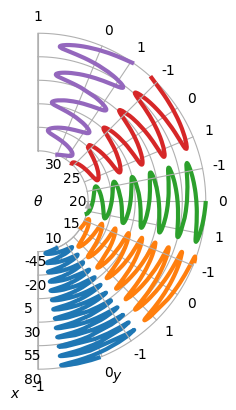

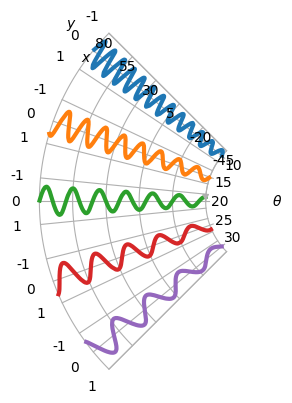

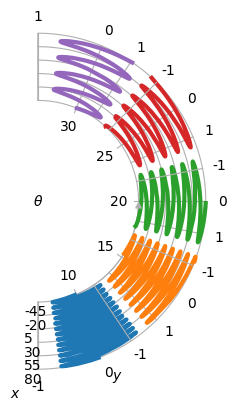

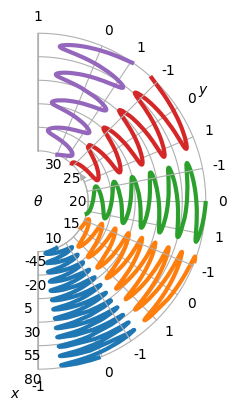

In [460]:
for LSC in LSCs[:]:
    fig = lstein.draw(LSC)
plt.show()